After background 

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import powerlaw
import ccHistStuff as cc
from iminuit import Minuit

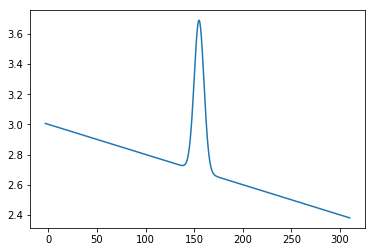

In [36]:
mass = np.loadtxt("mass.txt")
a=1
b=+3
def b_pdf(a,b,x):
    return -a*x + b

#def b1_pdf(a,b,x):
#    return -a*x + b

#def b2_pdf(a,b,x):
#    return -a*x + b

mu=155
sigma=5

x_values=np.linspace(-3, 310, 1000)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


def y(b_pdf, gaussian):
    return b_pdf(a,b,x_values)+gaussian(x_values,mu,sigma)

def y(x):
    return -(1/500)*x+3 + np.exp(-np.power(x - 155, 2.) / (2 * np.power(5, 2.)))

plt.plot(x_values, y(x_values))

plt.show()

In [4]:
def NLL(S,B,alpha): 
    # alpha=0  ---> use b_pdf
    # alpha=1  ---> use b1_pdf
    # alpha=-1 ---> use b2_pdf
    # (and smoothly interpolates vs. alpha)
    if alpha>0:
        new_b_pdf = b_pdf + alpha*(b1_pdf-b_pdf)
    else:
        new_b_pdf = b_pdf - alpha*(b2_pdf-b_pdf)    
    # should be already normalized, but make sure
    new_b_pdf = new_b_pdf / new_b_pdf.sum()  
    temp = d * np.log(S*s_pdf + B*new_b_pdf)
    return S + B - temp.sum() + alpha*alpha/2.

# Setup the fitter.  S, B, alpha are the initial guesses
# print_level=0 --> suppress print of intermediate information 
# errordef = 0.5   because for NLL 1 sigma errors are  from
#                  NLL-NLL(at minimum) = 0.5
# error_S, error_B, alpha: are initial steps to look for minimum
# We fix alpha=0 if shapeSyst=False


m = Minuit(NLL, S=10., B=500., alpha=0., print_level=1,
           errordef=0.5, error_S=1.0, error_B=1.0, error_alpha=0.1,
           fix_alpha=(not shapeSyst))

# Run the fitter
m.migrad()
m.minos()
m.print_param()

# Profile scan of the fitted function (NLL).
# At each FIXED value of S, fit again for B,
# extract the NLL at the minimum, subtract 
# the NLL at the GLOBAL minimum, and plot it
xxx, yyy, _ = m.mnprofile('S', subtract_min=True, bins=100, bound=(0,60))

# m.mnprofile does all the work... 
# Now we just plot the results
# deltaNLL = 0.5 (2, 4.5 ) corresponds to 1 (2, 3) sigma

fig3, ax3 = plt.subplots()
ax3.plot(xxx,yyy,linestyle='solid', color='b')
ax3.set_xlim(min(xxx), max(xxx))
ax3.set_ylim(0.)
ax3.set_xlabel('S')
ax3.set_ylabel('deltaNLL')
ax3.plot([min(xxx), max(xxx)], [0.5, 0.5], linestyle='dashed', color='red')
ax3.plot([min(xxx), max(xxx)], [2.0, 2.0], linestyle='dashed', color='red')
ax3.plot([min(xxx), max(xxx)], [4.5, 4.5], linestyle='dashed', color='red')
fig3.show()

NameError: name 'shapeSyst' is not defined